In [82]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
import ppscore as pps
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("adult_with_headers.csv")
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.shape

(32561, 15)

In [4]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [5]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [6]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [7]:
df['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [8]:
df['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [9]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [10]:
df['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [11]:
df['marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

In [12]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [13]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [14]:
df['native_country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

### Convert object columns with few unique values to 'category'

In [15]:
df['income'] = df['income'].astype('category')
df['sex'] = df['sex'].astype('category')
df['race'] = df['race'].astype('category')
df['relationship'] = df['relationship'].astype('category')
df['marital_status'] = df['marital_status'].astype('category')
df['education'] = df['education'].astype('category')
df['occupation'] = df['occupation'].astype('category')
df['native_country'] = df['native_country'].astype('category')
df['workclass'] = df['workclass'].astype('category')

In [16]:
df.dtypes

age                  int64
workclass         category
fnlwgt               int64
education         category
education_num        int64
marital_status    category
occupation        category
relationship      category
race              category
sex               category
capital_gain         int64
capital_loss         int64
hours_per_week       int64
native_country    category
income            category
dtype: object

### Missing Values

In [17]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

### Summary statistics

In [18]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [19]:
main_df= df.copy ()

# Visualisation

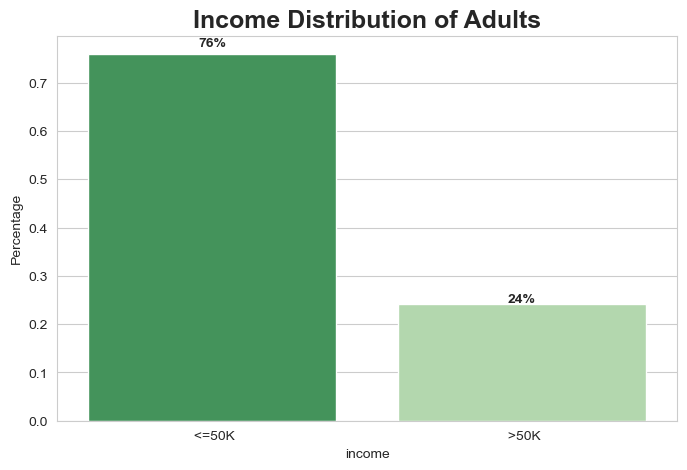

In [20]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Income Distribution of Adults', fontsize=18, fontweight='bold')
eda_percentage = df['income'].value_counts(normalize = True).rename_axis('income').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'income', y = 'Percentage', data = eda_percentage.head(10), palette='Greens_r')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

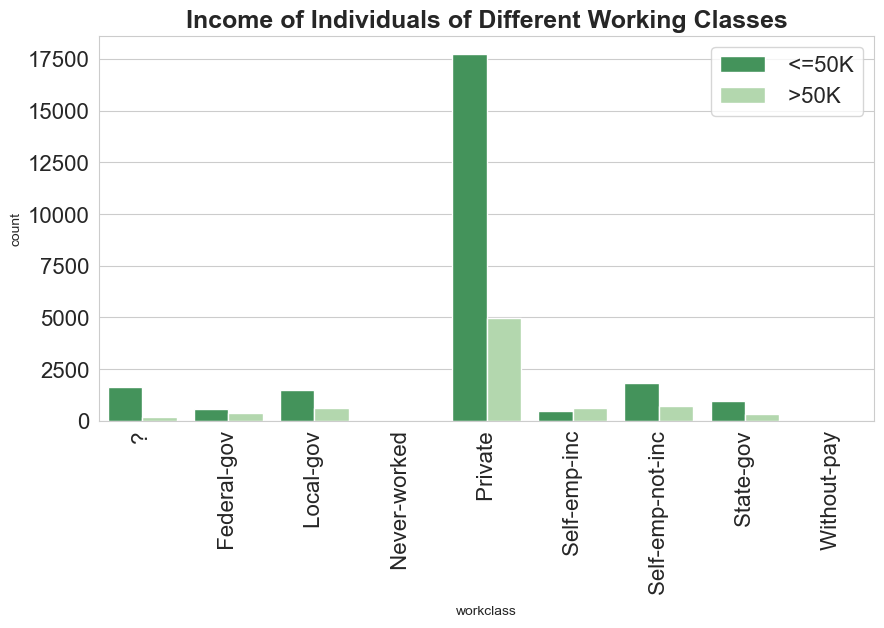

In [21]:
plt.figure(figsize=(10,5))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(x='workclass', data=df, hue='income', palette='Greens_r')
plt.title('Income of Individuals of Different Working Classes', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

It is quite interesting to see that Self-Employed is the only category where the number of people who earn more than 50K dollars exceed those earning less than it! It might be conducive to suggest that when you handle your own business, start-up, etc. you are more likely to earn better if it gets successful!

People working in the Private Sector face a significant difference between their pays where more than 75% of them earn less than 50K dollars an year!

There is a very minute difference between the number of people whose income is more or less than 50K dollars an year who work for the Federal Govt.

People belonging to the category Without-Pay and Never-Worked hardly contain any data in both the categories.

### Standard Scaling

### Apply scaling techniques to numerical features:

In [22]:
scaler = StandardScaler()
df_standard = scaler.fit_transform(df[['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']])
df_standard

array([[ 0.03067056, -1.06361075,  1.13473876,  0.1484529 , -0.21665953,
        -0.03542945],
       [ 0.83710898, -1.008707  ,  1.13473876, -0.14592048, -0.21665953,
        -2.22215312],
       [-0.04264203,  0.2450785 , -0.42005962, -0.14592048, -0.21665953,
        -0.03542945],
       ...,
       [ 1.42360965, -0.35877741, -0.42005962, -0.14592048, -0.21665953,
        -0.03542945],
       [-1.21564337,  0.11095988, -0.42005962, -0.14592048, -0.21665953,
        -1.65522476],
       [ 0.98373415,  0.92989258, -0.42005962,  1.88842434, -0.21665953,
        -0.03542945]])

### Min-Max Scaling (Normalization)

In [23]:
min_max_scaler = MinMaxScaler()
df_min_max = min_max_scaler.fit_transform(df[['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']])
df_min_max

array([[0.30136986, 0.0443019 , 0.8       , 0.02174022, 0.        ,
        0.39795918],
       [0.45205479, 0.0482376 , 0.8       , 0.        , 0.        ,
        0.12244898],
       [0.28767123, 0.13811345, 0.53333333, 0.        , 0.        ,
        0.39795918],
       ...,
       [0.56164384, 0.09482688, 0.53333333, 0.        , 0.        ,
        0.39795918],
       [0.06849315, 0.12849934, 0.53333333, 0.        , 0.        ,
        0.19387755],
       [0.47945205, 0.18720338, 0.53333333, 0.1502415 , 0.        ,
        0.39795918]])

## Discuss the scenarios where each scaling technique is preferred and why.

### Standard Scaling

Standard Scaling should be used when the features are approximately normally distributed or when you are working with algorithms that assume the data has a normal distribution, or when you're dealing with outliers that should not distort the scaling.

Standard scaling is ideal when the features are normally distributed (or approximately Gaussian) because it centers the data and scales it according to the spread of the data.
Reason: Algorithms like Linear Regression, Logistic Regression, and SVM (with linear kernels) perform better when the data is normally distributed, as they often assume that data has a bell-shaped distribution (Gaussian distribution).

Example Algorithms That Benefit from Standard Scaling:

Linear models (e.g., Linear Regression, Logistic Regression)

SVM with a linear kernel

K-Means Clustering

PCA (Principal Component Analysis)

K-Nearest Neighbors (KNN

### Min-Max Scaling

Min-Max Scaling should be used when you need to scale data to a specific bounded range (e.g., [0, 1]) or when working with algorithms that perform better when the features are normalized, such as neural networks, KNN, or when the data has a known range. However, it should be used with caution if the data contains significant outliers, as they can distort the scaling

Min-Max scaling is ideal for non-Gaussian data (i.e., data that does not follow a normal distribution). It’s especially useful when the data has a bounded range, or when you want to force the data into a specific range (such as [0, 1]).

Reason: Min-Max scaling does not assume that data follows any specific distribution, and it is particularly useful when working with neural networks or when you need the data to fall within a fixed range (e.g., when using image data or pixel values, which are typically in the range [0, 255]).

Example Algorithms That Benefit from Min-Max Scaling:

Neural Networks (e.g., Feedforward Networks, CNNs, RNNs)

K-Nearest Neighbors (KNN)

Deep Learning Models (e.g., for image data or time-series data)

Distance-based algorithms (e.g., K-means clustering)

# Encoding Techniques:

###  One Hot Encoding Using Pandas

In [24]:
df = pd.get_dummies(df, columns=['race', 'sex', 'relationship', 'income'], drop_first=False)
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,capital_gain,capital_loss,hours_per_week,...,sex_ Female,sex_ Male,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,income_ <=50K,income_ >50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,2174,0,40,...,0,1,0,1,0,0,0,0,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,0,0,13,...,0,1,1,0,0,0,0,0,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,0,0,40,...,0,1,0,1,0,0,0,0,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,0,0,40,...,0,1,1,0,0,0,0,0,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,0,0,40,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,0,0,38,...,1,0,0,0,0,0,0,1,1,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,0,0,40,...,0,1,1,0,0,0,0,0,0,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,0,0,40,...,1,0,0,0,0,0,1,0,1,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,0,0,20,...,0,1,0,0,0,1,0,0,1,0


### Label Encoding for categorical variables with more than 5 categories.

In [25]:
le = LabelEncoder()

In [26]:
columns_to_encode = ['marital_status', 'education', 'occupation', 'native_country', 'workclass']

In [27]:
# Apply Label Encoding to each column
for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])


In [28]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,capital_gain,capital_loss,hours_per_week,...,sex_ Female,sex_ Male,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,income_ <=50K,income_ >50K
0,39,7,77516,9,13,4,1,2174,0,40,...,0,1,0,1,0,0,0,0,1,0
1,50,6,83311,9,13,2,4,0,0,13,...,0,1,1,0,0,0,0,0,1,0
2,38,4,215646,11,9,0,6,0,0,40,...,0,1,0,1,0,0,0,0,1,0
3,53,4,234721,1,7,2,6,0,0,40,...,0,1,1,0,0,0,0,0,1,0
4,28,4,338409,9,13,2,10,0,0,40,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,0,0,38,...,1,0,0,0,0,0,0,1,1,0
32557,40,4,154374,11,9,2,7,0,0,40,...,0,1,1,0,0,0,0,0,0,1
32558,58,4,151910,11,9,6,1,0,0,40,...,1,0,0,0,0,0,1,0,1,0
32559,22,4,201490,11,9,4,1,0,0,20,...,0,1,0,0,0,1,0,0,1,0


# One-Hot Encoding

## Pros:
No Assumed Ordinality: Suitable for nominal categories (unordered), as no ranking is implied.

Prevents Misinterpretation: Avoids the model incorrectly assuming an ordinal relationship (e.g., 1 < 2 < 3).

Works Well for Many Categories: Ensures models don't confuse different categories by assigning them separate binary columns.

## Cons:
Increases Dimensionality: Can lead to a very large number of columns, especially with high-cardinality features (many unique values).

Sparse Data: Many 0s in the encoded columns, which can be inefficient for storage and computation.

Redundancy: Creates multiple columns that may have redundant information, especially if categories are sparse.

# Label Encoding

## Pros:
Low Dimensionality: Only one column is created, making it computationally efficient.

Memory Efficient: Uses less memory compared to One-Hot Encoding, as it doesn't create many new columns.

## Cons:
Assumes Ordinality: Imposes an ordinal relationship (e.g., 0 < 1 < 2), which can be misleading for nominal data.

Misinterpretation by Models: Algorithms may interpret numerical labels as ordered values, affecting performance (e.g., linear models, distance-based models).

## Feature Engineering:

In [29]:
corr_matrix = df.corr()

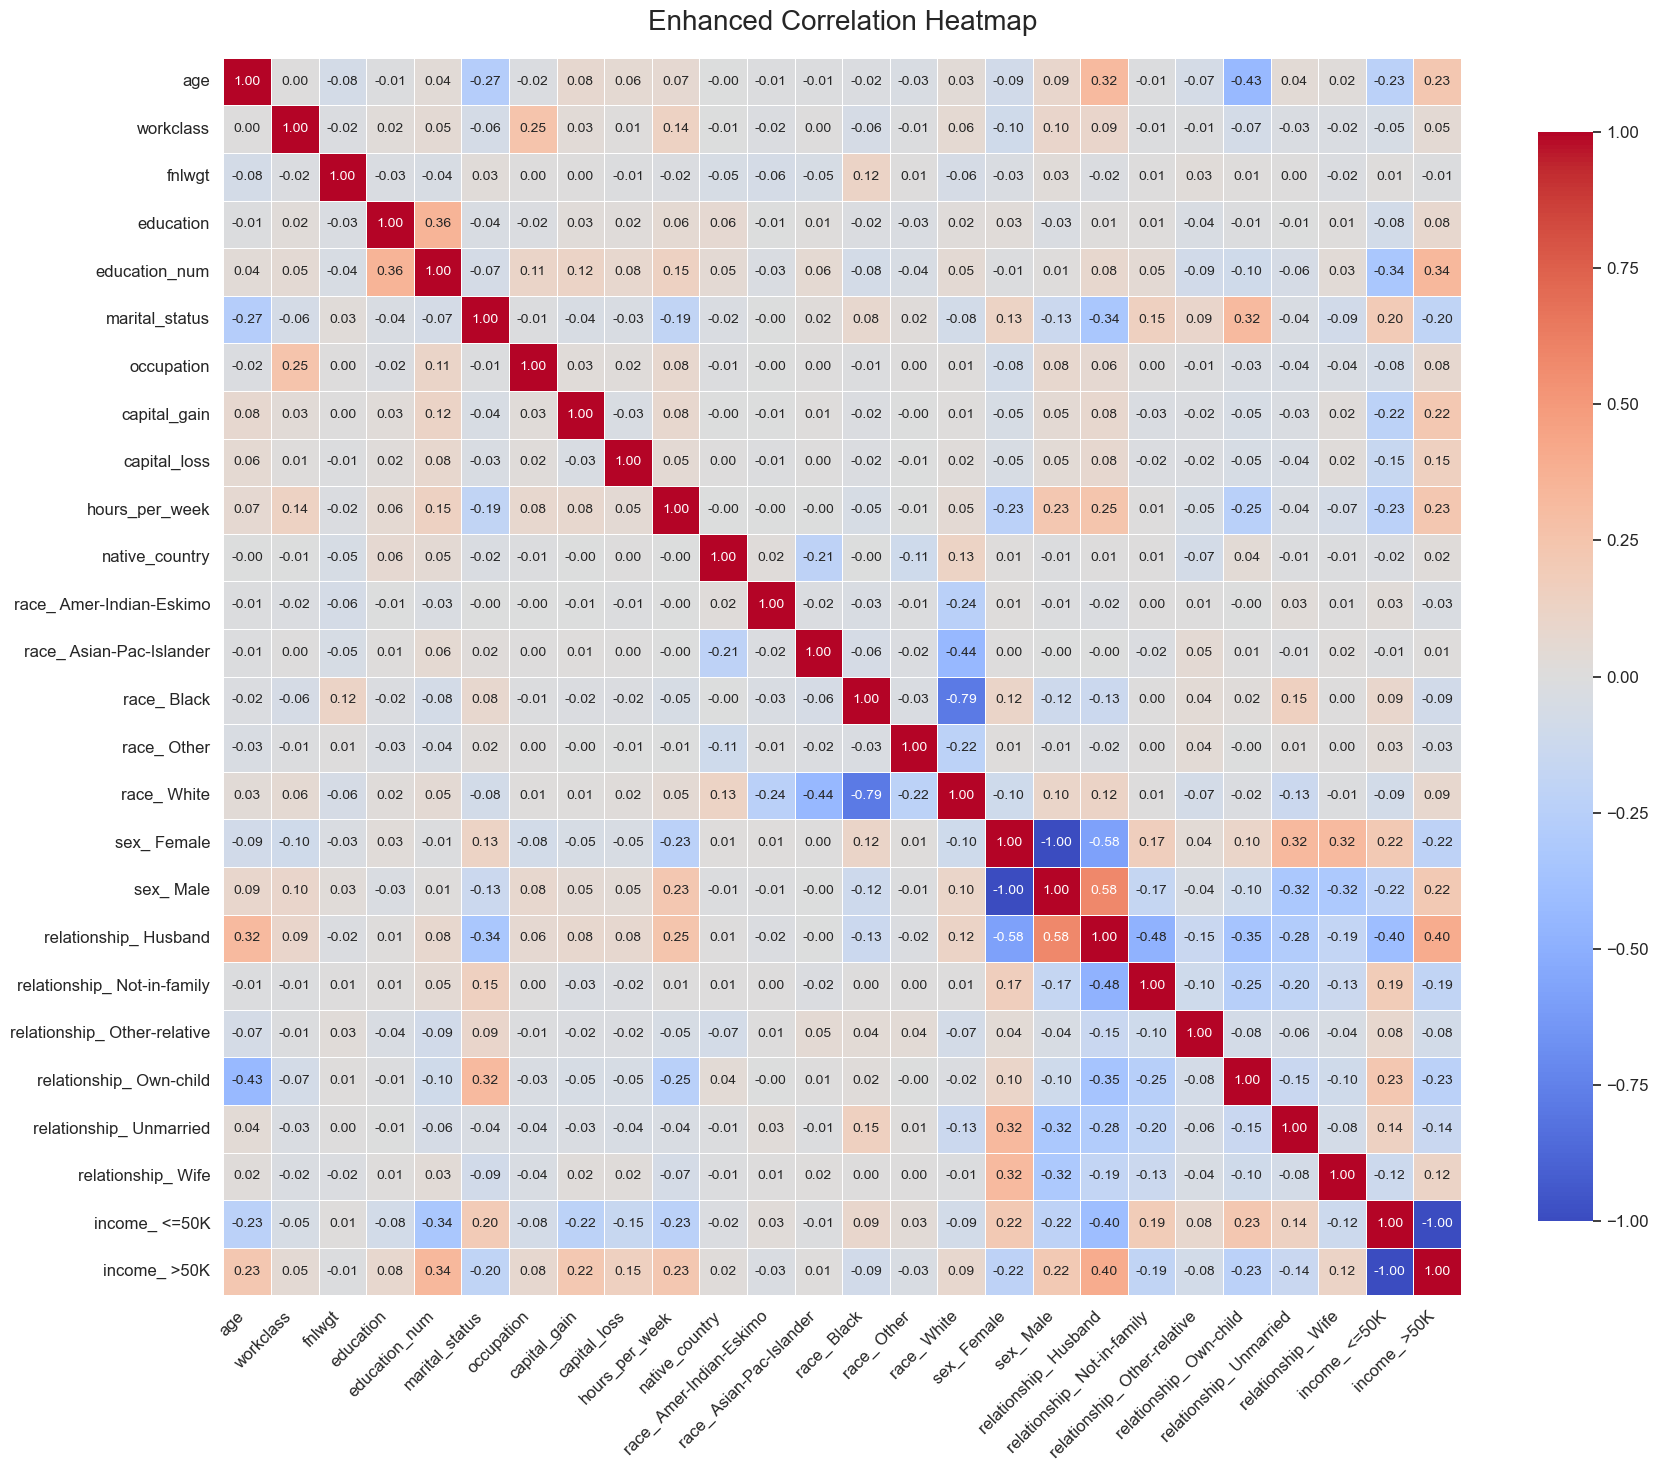

In [30]:
# Plot heatmap
plt.figure(figsize=(18, 16))  # Larger figure size for more space
sns.set(font_scale=1.1)       # Adjust font size for better readability
sns.heatmap(
    corr_matrix,
    annot=True,               # Show values
    fmt=".2f",                # Format values to 2 decimal places
    cmap="coolwarm",          # Use a diverging color map
    vmin=-1, vmax=1,          # Set color bar limits
    square=True,              # Make cells square
    cbar_kws={"shrink": 0.75},# Shrink the color bar
    annot_kws={"size": 10},   # Adjust font size of annotations
    linewidths=0.6            # Add space between cells
)

# Add titles and layout adjustments
plt.title("Enhanced Correlation Heatmap", fontsize=20, pad=20)
plt.xticks(rotation=45, ha="right", fontsize=12)  # Adjust x-axis labels
plt.yticks(fontsize=12)                          # Adjust y-axis labels
plt.tight_layout()                               # Fit everything nicely
plt.show()

In [31]:
corr_matrix 

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,capital_gain,capital_loss,hours_per_week,...,sex_ Female,sex_ Male,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,income_ <=50K,income_ >50K
age,1.000000,0.003787,-0.076646,-0.010508,0.036527,-0.266288,-0.020947,0.077674,0.057775,0.068756,...,-0.088832,0.088832,0.316875,-0.010106,-0.070002,-0.432918,0.043188,0.020854,-0.234037,0.234037
workclass,0.003787,1.000000,-0.016656,0.023513,0.052085,-0.064731,0.254892,0.033835,0.012216,0.138962,...,-0.095981,0.095981,0.094130,-0.010992,-0.012141,-0.072126,-0.026071,-0.024181,-0.051604,0.051604
fnlwgt,-0.076646,-0.016656,1.000000,-0.028145,-0.043195,0.028153,0.001597,0.000432,-0.010252,-0.018768,...,-0.026858,0.026858,-0.021140,0.007503,0.025518,0.013818,0.004400,-0.016897,0.009463,-0.009463
education,-0.010508,0.023513,-0.028145,1.000000,0.359153,-0.038407,-0.021260,0.030046,0.016746,0.055510,...,0.027356,-0.027356,0.011213,0.010475,-0.038324,-0.009507,-0.005743,0.007910,-0.079317,0.079317
education_num,0.036527,0.052085,-0.043195,0.359153,1.000000,-0.069304,0.109697,0.122630,0.079923,0.148123,...,-0.012280,0.012280,0.078848,0.053430,-0.088631,-0.099213,-0.058637,0.033427,-0.335154,0.335154
marital_status,-0.266288,-0.064731,0.028153,-0.038407,-0.069304,1.000000,-0.009654,-0.043393,-0.034187,-0.190519,...,0.129314,-0.129314,-0.335634,0.148832,0.094208,0.315775,-0.035355,-0.092511,0.199307,-0.199307
occupation,-0.020947,0.254892,0.001597,-0.021260,0.109697,-0.009654,1.000000,0.025505,0.017987,0.080383,...,-0.080296,0.080296,0.062544,0.004272,-0.008704,-0.031566,-0.039465,-0.035009,-0.075468,0.075468
capital_gain,0.077674,0.033835,0.000432,0.030046,0.122630,-0.043393,0.025505,1.000000,-0.031615,0.078409,...,-0.048480,0.048480,0.080175,-0.026489,-0.019046,-0.053601,-0.029004,0.017730,-0.223329,0.223329
capital_loss,0.057775,0.012216,-0.010252,0.016746,0.079923,-0.034187,0.017987,-0.031615,1.000000,0.054256,...,-0.045567,0.045567,0.075491,-0.017299,-0.015734,-0.050922,-0.039136,0.017138,-0.150526,0.150526
hours_per_week,0.068756,0.138962,-0.018768,0.055510,0.148123,-0.190519,0.080383,0.078409,0.054256,1.000000,...,-0.229309,0.229309,0.246164,0.007498,-0.048980,-0.249254,-0.037182,-0.065140,-0.229689,0.229689


In [32]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'capital_gain', 'capital_loss',
       'hours_per_week', 'native_country', 'race_ Amer-Indian-Eskimo',
       'race_ Asian-Pac-Islander', 'race_ Black', 'race_ Other', 'race_ White',
       'sex_ Female', 'sex_ Male', 'relationship_ Husband',
       'relationship_ Not-in-family', 'relationship_ Other-relative',
       'relationship_ Own-child', 'relationship_ Unmarried',
       'relationship_ Wife', 'income_ <=50K', 'income_ >50K'],
      dtype='object')

In [33]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,capital_gain,capital_loss,hours_per_week,...,sex_ Female,sex_ Male,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,income_ <=50K,income_ >50K
0,39,7,77516,9,13,4,1,2174,0,40,...,0,1,0,1,0,0,0,0,1,0
1,50,6,83311,9,13,2,4,0,0,13,...,0,1,1,0,0,0,0,0,1,0
2,38,4,215646,11,9,0,6,0,0,40,...,0,1,0,1,0,0,0,0,1,0
3,53,4,234721,1,7,2,6,0,0,40,...,0,1,1,0,0,0,0,0,1,0
4,28,4,338409,9,13,2,10,0,0,40,...,1,0,0,0,0,0,0,1,1,0


In [34]:
# Feature 1: Income-to-Hours Ratio
df["income_to_hours_ratio"] = (df["capital_gain"] - df["capital_loss"]) / (df["hours_per_week"] + 1e-5)


The value 1e-5 represents 1 × 10 raise to −5 , or 0.00001, a very small number added to avoid division by zero.

If hours_per_week is 0, division by zero would result in an error. Adding 1e-5 ensures that the denominator is never exactly zero while having a negligible impact on the result. For instance:

If hours_per_week = 40, adding 1e-5 doesn't change the ratio in any meaningful way.
If hours_per_week = 0, the small value prevents an error but keeps the result well-behaved.

In [35]:
df["income_to_hours_ratio"] = df["income_to_hours_ratio"]
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,capital_gain,capital_loss,hours_per_week,...,sex_ Male,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,income_ <=50K,income_ >50K,income_to_hours_ratio
0,39,7,77516,9,13,4,1,2174,0,40,...,1,0,1,0,0,0,0,1,0,54.349986
1,50,6,83311,9,13,2,4,0,0,13,...,1,1,0,0,0,0,0,1,0,0.000000
2,38,4,215646,11,9,0,6,0,0,40,...,1,0,1,0,0,0,0,1,0,0.000000
3,53,4,234721,1,7,2,6,0,0,40,...,1,1,0,0,0,0,0,1,0,0.000000
4,28,4,338409,9,13,2,10,0,0,40,...,0,0,0,0,0,0,1,1,0,0.000000


Text(0, 0.5, 'Density')

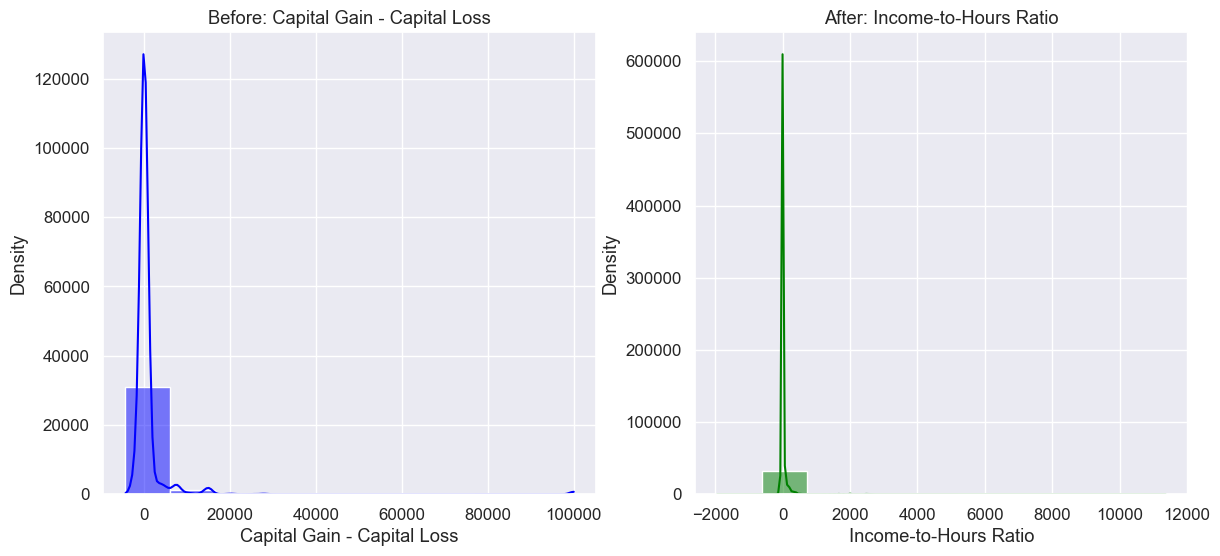

In [36]:
# Visualization 1: Income-to-Hours Ratio
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df["capital_gain"] - df["capital_loss"], kde=True, bins=10, color="blue")
plt.title("Before: Capital Gain - Capital Loss")
plt.xlabel("Capital Gain - Capital Loss")
plt.ylabel("Density")

plt.subplot(1, 2, 2)
sns.histplot(df["income_to_hours_ratio"], kde=True, bins=10, color="green")
plt.title("After: Income-to-Hours Ratio")
plt.xlabel("Income-to-Hours Ratio")
plt.ylabel("Density")

In [37]:
# Feature 2: Education Experience Score

df["education_experience_score"] = df["education_num"] * df["age"]

In [38]:
df["education_experience_score"]=df["education_experience_score"]
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,capital_gain,capital_loss,hours_per_week,...,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,income_ <=50K,income_ >50K,income_to_hours_ratio,education_experience_score
0,39,7,77516,9,13,4,1,2174,0,40,...,0,1,0,0,0,0,1,0,54.349986,507
1,50,6,83311,9,13,2,4,0,0,13,...,1,0,0,0,0,0,1,0,0.000000,650
2,38,4,215646,11,9,0,6,0,0,40,...,0,1,0,0,0,0,1,0,0.000000,342
3,53,4,234721,1,7,2,6,0,0,40,...,1,0,0,0,0,0,1,0,0.000000,371
4,28,4,338409,9,13,2,10,0,0,40,...,0,0,0,0,0,1,1,0,0.000000,364


Text(0, 0.5, 'Density')

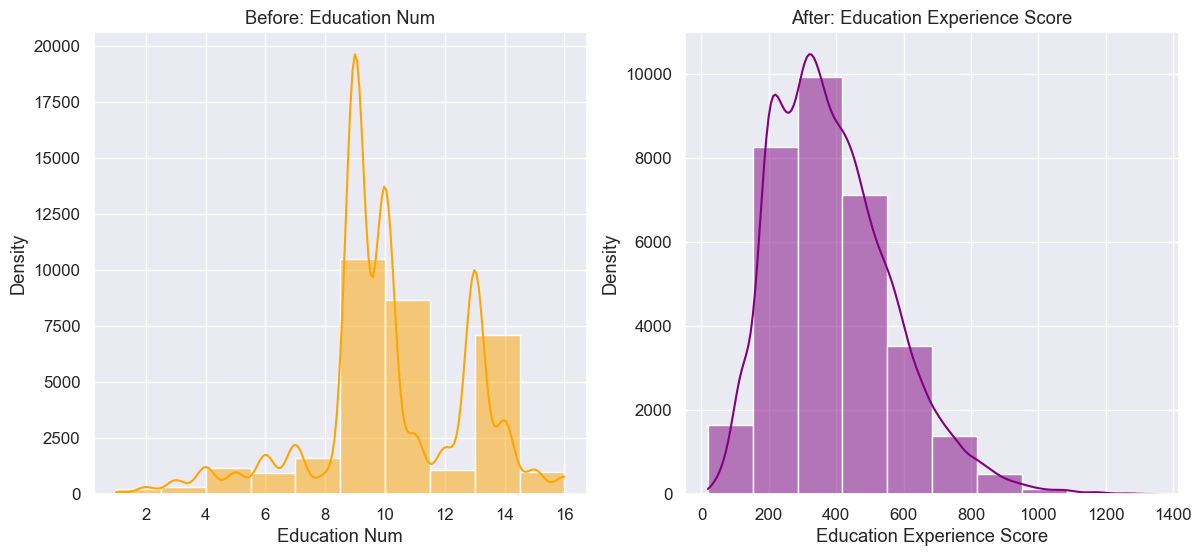

In [39]:
# Visualization 2: Education Experience Score
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df["education_num"], kde=True, bins=10, color="orange")
plt.title("Before: Education Num")
plt.xlabel("Education Num")
plt.ylabel("Density")

plt.subplot(1, 2, 2)
sns.histplot(df["education_experience_score"], kde=True, bins=10, color="purple")
plt.title("After: Education Experience Score")
plt.xlabel("Education Experience Score")
plt.ylabel("Density")



Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.

In [40]:
# Transformation: Log transform fnlwgt

df["fnlwgt_log"] = np.log(df["fnlwgt"] + 1)

In [41]:
df["fnlwgt_log"]=df["fnlwgt_log"]
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,capital_gain,capital_loss,hours_per_week,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,income_ <=50K,income_ >50K,income_to_hours_ratio,education_experience_score,fnlwgt_log
0,39,7,77516,9,13,4,1,2174,0,40,...,1,0,0,0,0,1,0,54.349986,507,11.258253
1,50,6,83311,9,13,2,4,0,0,13,...,0,0,0,0,0,1,0,0.000000,650,11.330348
2,38,4,215646,11,9,0,6,0,0,40,...,1,0,0,0,0,1,0,0.000000,342,12.281398
3,53,4,234721,1,7,2,6,0,0,40,...,0,0,0,0,0,1,0,0.000000,371,12.366157
4,28,4,338409,9,13,2,10,0,0,40,...,0,0,0,0,1,1,0,0.000000,364,12.732013


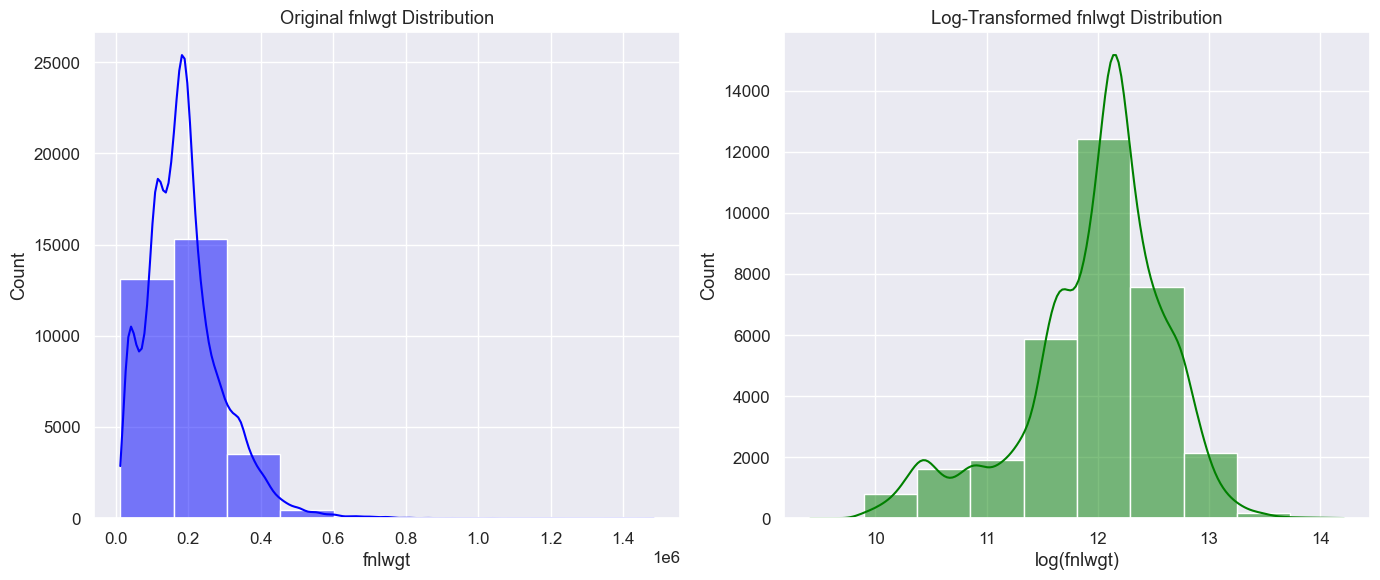

In [42]:
# Visualization: Original and Transformed fnlwgt
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df["fnlwgt"], kde=True, color="blue", bins=10)
plt.title("Original fnlwgt Distribution")
plt.xlabel("fnlwgt")

plt.subplot(1, 2, 2)
sns.histplot(df["fnlwgt_log"], kde=True, color="green", bins=10)
plt.title("Log-Transformed fnlwgt Distribution")
plt.xlabel("log(fnlwgt)")

plt.tight_layout()
plt.show()

In [43]:
# Feature 4: Dependency Index

df["dependency_index"] = df["fnlwgt"] / (df["hours_per_week"] + 1e-5)

In [44]:
df["dependency_index"]=df["dependency_index"]
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,capital_gain,capital_loss,hours_per_week,...,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,income_ <=50K,income_ >50K,income_to_hours_ratio,education_experience_score,fnlwgt_log,dependency_index
0,39,7,77516,9,13,4,1,2174,0,40,...,0,0,0,0,1,0,54.349986,507,11.258253,1937.899516
1,50,6,83311,9,13,2,4,0,0,13,...,0,0,0,0,1,0,0.000000,650,11.330348,6408.533532
2,38,4,215646,11,9,0,6,0,0,40,...,0,0,0,0,1,0,0.000000,342,12.281398,5391.148652
3,53,4,234721,1,7,2,6,0,0,40,...,0,0,0,0,1,0,0.000000,371,12.366157,5868.023533
4,28,4,338409,9,13,2,10,0,0,40,...,0,0,0,1,1,0,0.000000,364,12.732013,8460.222885


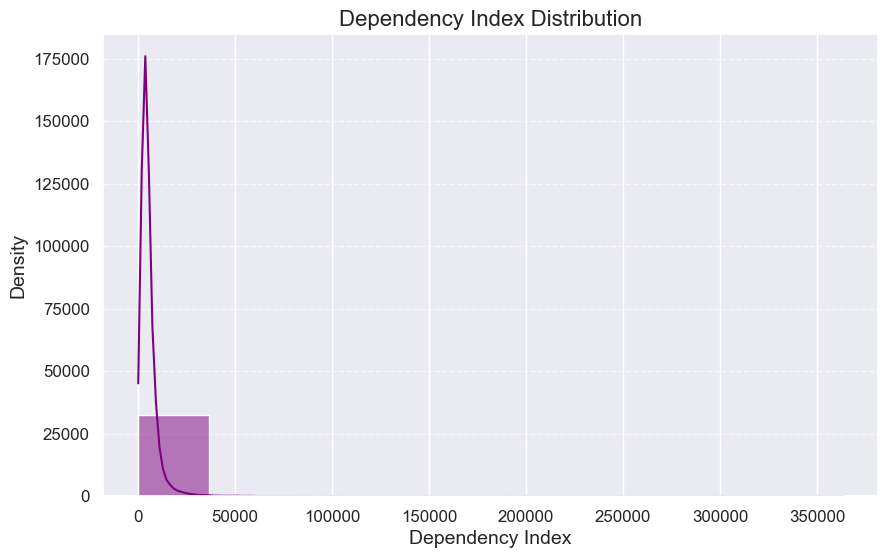

In [45]:
# Visualization: Dependency Index Distribution as a standalone plot

plt.figure(figsize=(10, 6))
sns.histplot(df["dependency_index"], kde=True, color="purple", bins=10)
plt.title("Dependency Index Distribution", fontsize=16)
plt.xlabel("Dependency Index", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Feature Selection:

#### Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.

In [69]:
# training the model

clf = IsolationForest(random_state=10,contamination=.03) # 1% of datapoints will be treated as outliers our data set has 32561 rows so 30% of 150
clf.fit(df)

#An IsolationForest with contamination=0.3 would identify the "top 30" percent of outliers.

IsolationForest(contamination=0.03, random_state=10)

In [70]:
# predictions
y_pred_outliers = clf.predict(df)

In [71]:
#-1 for outliers and 1 for inliers.
y_pred_outliers

array([1, 1, 1, ..., 1, 1, 1])

In [72]:
df[df == -1]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,capital_gain,capital_loss,hours_per_week,...,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,income_ <=50K,income_ >50K,income_to_hours_ratio,education_experience_score,fnlwgt_log,dependency_index
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
## Let us add a new data point which is outlier so see if our algorithm catches it
  # df.loc[32562]=[99,879,330,550,81,802,20,458,24,0,55,75,148,2,50,14,16,25,246,2451,675,20,25,5,56,6,5,6,5,6]

In [51]:
# training the model
#clf1 = IsolationForest(random_state=10,contamination=.01)
#clf1.fit(df)

In [52]:
# predictions
#y_pred_outliers = clf1.predict(df)
#y_pred_outliers

#### Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.

In [79]:
main_df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### The score ranges from 0 (no predictive power) to 1 (perfect predictive power).

PPS < 0.1: Very weak prediction

0.1 - 0.3: Weak prediction

0.3 - 0.5: Moderate prediction

0.5 - 0.7: Strong prediction

0.7: Very strong prediction

In [95]:
pps1=pps.score(main_df, "workclass", "income")  
pps1

# score of 0.0941 (or about 9.4%) indicates a very weak predictive relationship between the variables.

{'x': 'workclass',
 'y': 'income',
 'ppscore': 0.0940557685801341,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.6531153390987711,
 'model_score': 0.6857418424884953,
 'model': DecisionTreeClassifier()}

In [96]:
pps2=pps.score(main_df, "education", "income")  
pps2


{'x': 'education',
 'y': 'income',
 'ppscore': 0.2431351218589835,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.6531153390987711,
 'model_score': 0.7374551833980035,
 'model': DecisionTreeClassifier()}

In [113]:
pps3=pps.score(main_df, "hours_per_week", "income") 
pps3

{'x': 'hours_per_week',
 'y': 'income',
 'ppscore': 0.04727792815029037,
 'case': 'classification',
 'is_valid_score': True,
 'metric': 'weighted F1',
 'baseline_score': 0.6531153390987711,
 'model_score': 0.6695153271732972,
 'model': DecisionTreeClassifier()}

In [114]:
pps_matrix=pps.matrix(main_df)
pps_matrix.head(50)
#gives every combination check X And Y columns below

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.000000e+00,predict_itself,True,None,0.000000,1.000000,None
1,age,workclass,1.123161e-02,classification,True,weighted F1,0.579088,0.583816,DecisionTreeClassifier()
2,age,fnlwgt,0.000000e+00,regression,True,mean absolute error,75872.186200,77535.141544,DecisionTreeRegressor()
3,age,education,5.231462e-02,classification,True,weighted F1,0.201200,0.242989,DecisionTreeClassifier()
4,age,education_num,0.000000e+00,regression,True,mean absolute error,1.853000,1.898306,DecisionTreeRegressor()
5,age,marital_status,2.981185e-01,classification,True,weighted F1,0.343600,0.539285,DecisionTreeClassifier()
6,age,occupation,2.700685e-02,classification,True,weighted F1,0.103800,0.128004,DecisionTreeClassifier()
7,age,relationship,1.992051e-01,classification,True,weighted F1,0.268000,0.413818,DecisionTreeClassifier()
8,age,race,1.747134e-07,classification,True,weighted F1,0.783630,0.783630,DecisionTreeClassifier()
9,age,sex,0.000000e+00,classification,True,weighted F1,0.567200,0.555548,DecisionTreeClassifier()


In [115]:
pps_matrix.tail(50)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
175,capital_loss,capital_gain,0.000000e+00,regression,True,mean absolute error,1093.884000,2005.067857,DecisionTreeRegressor()
176,capital_loss,capital_loss,1.000000e+00,predict_itself,True,None,0.000000,1.000000,None
177,capital_loss,hours_per_week,0.000000e+00,regression,True,mean absolute error,7.656400,7.833053,DecisionTreeRegressor()
178,capital_loss,native_country,0.000000e+00,classification,True,weighted F1,0.841082,0.840540,DecisionTreeClassifier()
179,capital_loss,income,1.417549e-01,classification,True,weighted F1,0.653115,0.702288,DecisionTreeClassifier()
180,hours_per_week,age,2.376806e-03,regression,True,mean absolute error,11.205800,11.179166,DecisionTreeRegressor()
181,hours_per_week,workclass,2.244163e-02,classification,True,weighted F1,0.579088,0.588534,DecisionTreeClassifier()
182,hours_per_week,fnlwgt,0.000000e+00,regression,True,mean absolute error,75872.186200,77107.746325,DecisionTreeRegressor()
183,hours_per_week,education,5.384515e-02,classification,True,weighted F1,0.201200,0.244212,DecisionTreeClassifier()
184,hours_per_week,education_num,0.000000e+00,regression,True,mean absolute error,1.853000,1.898740,DecisionTreeRegressor()


Key insights:

native_country → income: Strong prediction ability (0.841)

age → marital_status (0.298): Age has moderate predictive power for marital status
    
age → relationship (0.199): Age can somewhat predict relationship status

capital_loss → income (0.142): Some predictive power for income level

hours_per_week → sex (0.139): Working hours have some predictive power for gender

hours_per_week → marital_status (0.122): Working hours somewhat predict marital status

native_country → race (0.182): Moderate relationship between country and race

income → marital_status (0.174): Income has some predictive power for marital status